# Setting

In [1]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Đọc dữ liệu

In [2]:
df = pd.read_csv('D:\\9. ky2nam3\\ML\\Project_ML\\data\\preprocessed_data.csv')
X = df.drop(columns=['satisfaction_satisfied', "Index", "id"])
y  = df['satisfaction_satisfied']

# Giảm chiều với PCA

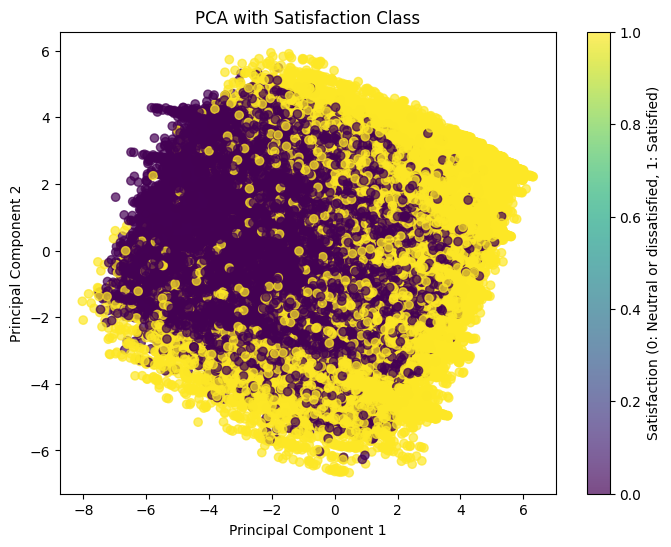

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Satisfaction Class')

plt.colorbar(scatter, label='Satisfaction (0: Neutral or dissatisfied, 1: Satisfied)')

plt.show()

# Giảm chiều với LDA

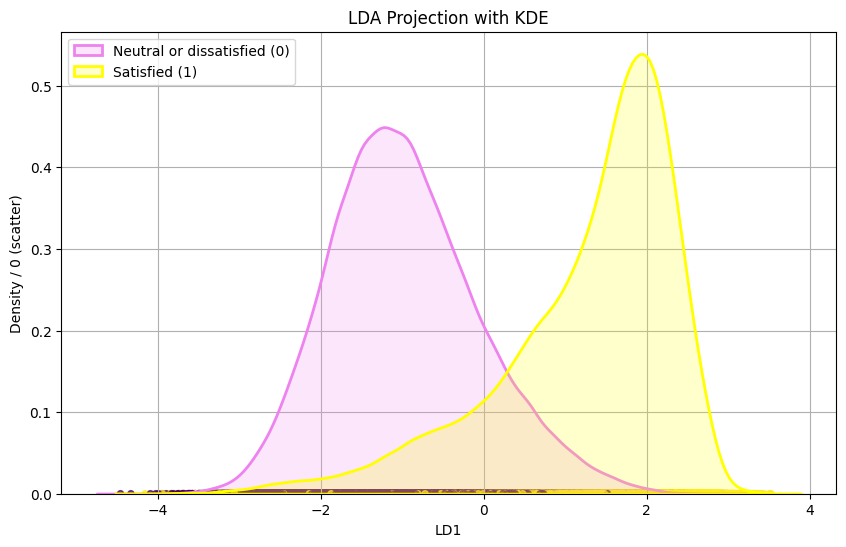

In [4]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    X_lda[:, 0], 
    [0] * len(X_lda), 
    c=y, 
    cmap='viridis', 
    alpha=0.7, 
    s=20, 
    zorder=1
)

sns.kdeplot(
    X_lda[y == 0, 0], 
    fill=True, 
    alpha=0.2, 
    color='violet',
    label='Neutral or dissatisfied (0)', 
    ax=ax, 
    linewidth=2,
    zorder=2
)
sns.kdeplot(
    X_lda[y == 1, 0], 
    fill=True, 
    alpha=0.2, 
    color='yellow',
    label='Satisfied (1)', 
    ax=ax, 
    linewidth=2,
    zorder=2
)    

ax.set_xlabel('LD1')
ax.set_ylabel('Density / 0 (scatter)')
ax.set_title('LDA Projection with KDE')
ax.legend()
ax.grid(True)

plt.show()